<a href="https://colab.research.google.com/github/Gopi138942/Ghibli-Art-Generator-using-AI/blob/main/Ghibli_generator_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# # Studio Ghibli Art Generator (Colab Optimized)
#
# **Faster execution with progress tracking** - Perfect for LinkedIn demos!

# %%
# @title Setup (Run First)

In [1]:

import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt
import time
from tqdm.auto import tqdm
import logging

In [2]:

# Setup logging with timestamps
logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)

In [3]:

# Check GPU info
gpu_info = !nvidia-smi
logger.info("GPU Information:\n" + '\n'.join(gpu_info))

In [4]:




# %%
# @title Initialize Model (2-5 minutes first run, cached afterwards)
class GhibliArtGenerator:
    def __init__(self):
        start_time = time.time()

        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        logger.info(f"Using device: {self.device}")

        # Optimized model loading
        model_id = "nitrosocke/Ghibli-Diffusion"

        logger.info("⏳ Loading model (this will take 2-5 minutes first time)...")
        with tqdm(total=4, desc="Model Loading") as pbar:
            self.pipe = StableDiffusionPipeline.from_pretrained(
                model_id,
                torch_dtype=torch.float16,
                safety_checker=None,
                requires_safety_checker=False
            ).to(self.device)
            pbar.update(1)

            # Colab-specific optimizations
            self.pipe.enable_attention_slicing(1)
            pbar.update(1)

            if 'A100' in '\n'.join(gpu_info):
                self.pipe.enable_xformers_memory_efficient_attention()
            pbar.update(1)

            # Warmup
            self.pipe("warmup", num_inference_steps=1)
            pbar.update(1)

        load_time = time.time() - start_time
        logger.info(f"✅ Model ready in {load_time:.2f} seconds")

    def generate_art(self, prompt, negative_prompt=None, num_images=1):
        """Optimized generation with progress tracking"""
        start_time = time.time()

        if negative_prompt is None:
            negative_prompt = "low quality, ugly, disfigured, deformed, blurry"

        enhanced_prompt = f"{prompt}, ghibli style, studio ghibli, anime style, vibrant, beautiful"

        logger.info(f"🎨 Generating {num_images} image(s) for: '{prompt}'")

        with torch.inference_mode():
            images = []
            for _ in tqdm(range(num_images), desc="Generating"):
                result = self.pipe(
                    prompt=enhanced_prompt,
                    negative_prompt=negative_prompt,
                    num_inference_steps=20,  # Optimized for Colab
                    guidance_scale=7,
                    width=512,
                    height=512
                )
                images.append(result.images[0])

        gen_time = time.time() - start_time
        logger.info(f"✨ Generated {num_images} image(s) in {gen_time:.2f} seconds ({gen_time/num_images:.2f}s per image)")

        return images

# %%


# %% [markdown]
# ## ⚡ Performance Tips:
# 1. **First run**: 5-7 min (model download)
# 2. **Subsequent runs**: ~10s per image (T4) / ~5s (A100)
# 3. **Reduce size**: Change width/height to 384 for faster generation
# 4. **Batch generate**: Set `num_images=4` to generate multiple at once

In [5]:
 # Initialize (cached after first run)
generator = GhibliArtGenerator()

Model Loading:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
 # Example prompts (edit these!)
prompts = [
        "a magical forest with glowing creatures at night",
        "a young witch flying on a broom over a coastal town",
        "a friendly forest spirit sitting by a river"
    ]

Generating:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

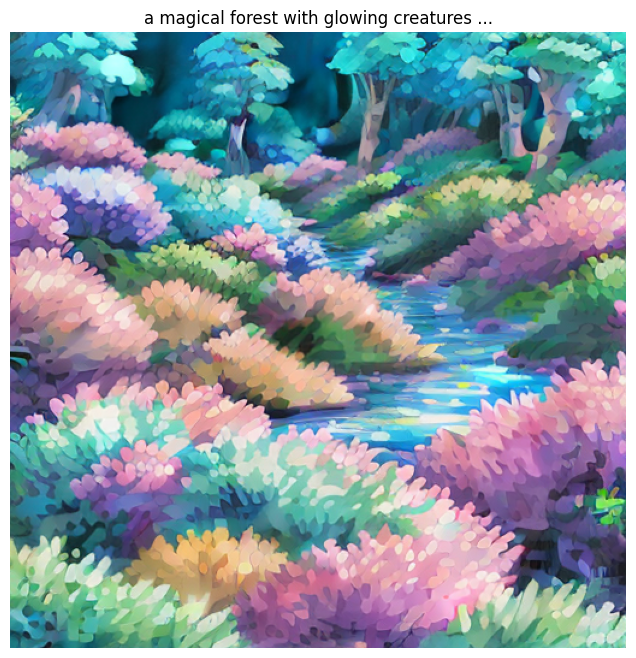

Generating:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

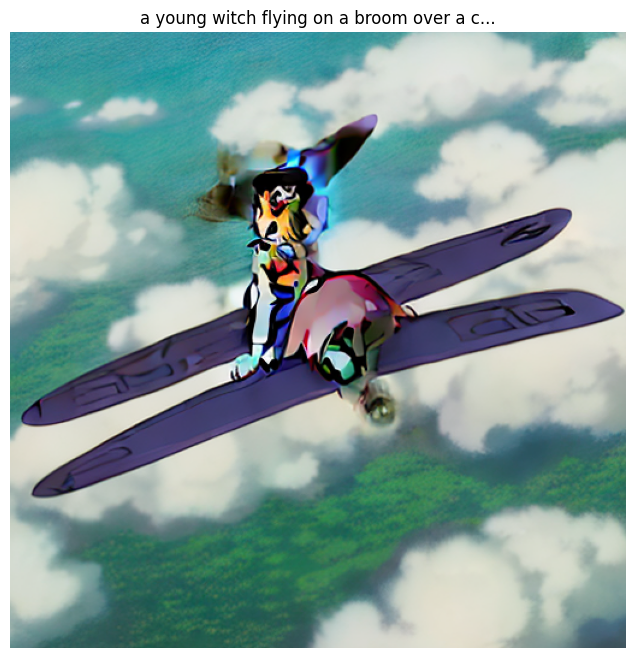

Generating:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

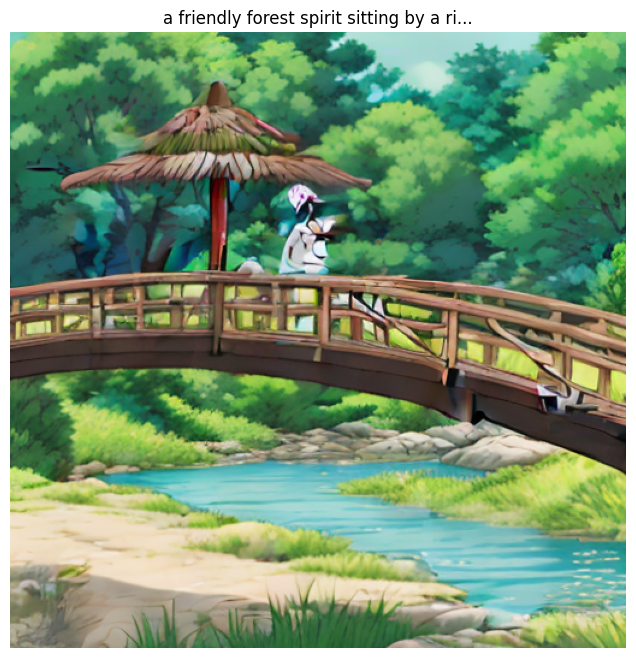

In [7]:
all_images = []

    # Generate with progress tracking
for prompt in prompts:
        images = generator.generate_art(prompt, num_images=1)
        all_images.extend(images)

        # Display immediately
        plt.figure(figsize=(8, 8))
        plt.imshow(images[0])
        plt.axis('off')
        plt.title(prompt[:40] + "..." if len(prompt) > 40 else prompt)
        plt.show()

        # Save to Colab
        images[0].save(f"ghibli_{len(all_images)}.png")
        logger.info(f"Saved as ghibli_{len(all_images)}.png")
